## Extra Tutoring and Student Performance

<p style="text-align: center;">
<img src="../../../images/child-with-teacher.jpg" alt="Demographics and Background" style="width: 700px; height: 400px;">
</p>

### Introduction
This analysis explores the relationship between participation in extra tutoring sessions and student performance, specifically regarding their ability to meet Joint Admissions and Matriculation Board (JAMB) goals.

### Key Questions
1. **How does participation in extra tutoring correlate with improved performance?**

2. **Are students who attend tutoring more likely to achieve their JAMB goals?**

   AND MORE!

In [19]:
import pandas as pd
from sqlalchemy import create_engine, inspect,text
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [21]:
# Database path in the schema folder
db_path = '../../../Schema/student_database.db'

engine = create_engine(f'sqlite:///{db_path}')

with engine.connect() as conn:
    print("Connected to the database.")
    
    inspector = inspect(engine)
    tables = inspector.get_table_names()
    print("Tables in the database:", tables)

Connected to the database.
Tables in the database: ['student_performance']


In [22]:
query = "SELECT * FROM student_performance;"
data_frame = pd.read_sql(query, con=engine)
data_frame.shape

(100, 47)

In [23]:
performance_mapping = {
    'Below 40%': 1,
    '40% - 59%': 2,
    '60% - 69%': 3,
    '70% - 100%': 4
}

data_frame['Last_Exam_Score'] = data_frame['Last Exam Performance'].map(performance_mapping)

# Grouping by Extra Tutoring Participation and calculating average performance
tutoring_performance = data_frame.groupby('Extra Tutoring')['Last_Exam_Score'].mean().reset_index()

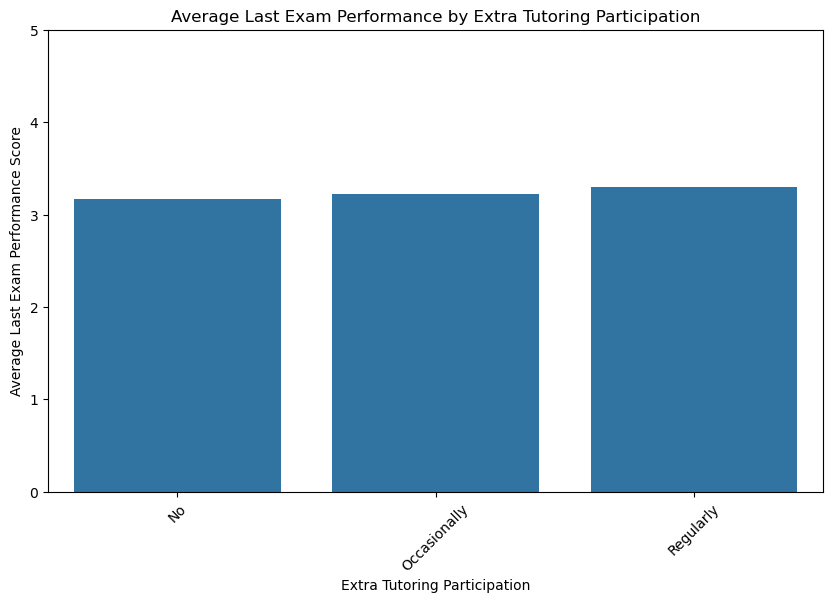

  Extra Tutoring  Last_Exam_Score
0             No         3.166667
1   Occasionally         3.227273
2      Regularly         3.300000


<Figure size 640x480 with 0 Axes>

In [26]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Extra Tutoring', y='Last_Exam_Score', data=tutoring_performance)
plt.title('Average Last Exam Performance by Extra Tutoring Participation')
plt.xlabel('Extra Tutoring Participation')
plt.ylabel('Average Last Exam Performance Score')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.show()

image_path = '../../../docs/avgper.png'  
plt.savefig(image_path)

# Displaying the average performance data
print(tutoring_performance)

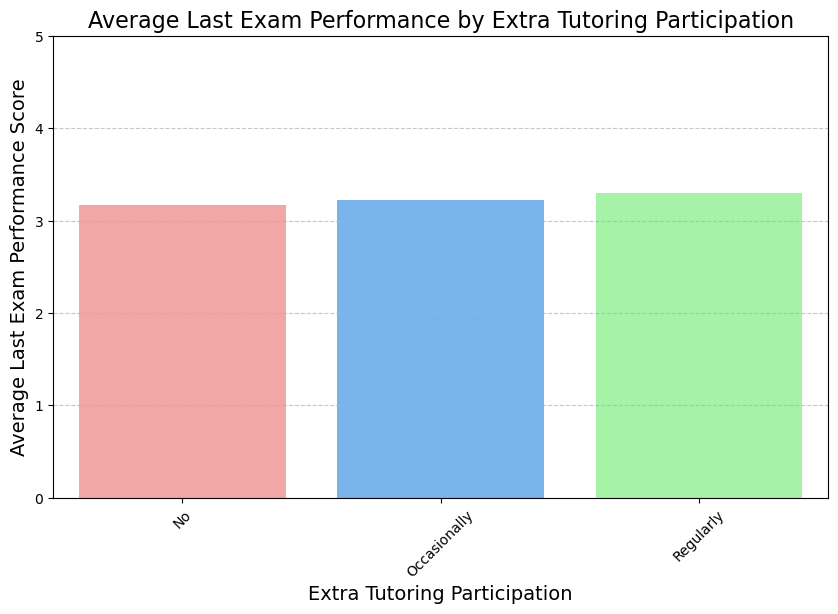

<Figure size 640x480 with 0 Axes>

In [41]:
custom_palette = ['#FF9999', '#66B3FF', '#99FF99']  # Light Red, Light Blue, Light Green

plt.figure(figsize=(10, 6))
sns.barplot(x='Extra Tutoring', y='Last_Exam_Score', data=tutoring_performance, palette=custom_palette,hue = "Extra Tutoring")
plt.title('Average Last Exam Performance by Extra Tutoring Participation', fontsize=16)
plt.xlabel('Extra Tutoring Participation', fontsize=14)
plt.ylabel('Average Last Exam Performance Score', fontsize=14)
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

image_path = '../../../docs/avglasper.png'  
plt.savefig(image_path)


## Insight on Extra Tutoring and Last Exam Score

### Overview
This analysis examines the relationship between the frequency of extra tutoring and students' last exam scores. 

### Data Summary

| Extra Tutoring    | Last Exam Score |
|-------------------|-----------------|
| No                | 3.166667        |
| Occasionally       | 3.227273        |
| Regularly         | 3.300000        |

### Insights
- **Impact of Tutoring Frequency**: 
  - Students who do not receive extra tutoring have an average last exam score of **3.17**.
  - Students receiving tutoring **occasionally** score slightly higher with an average of **3.23**.
  - Those who receive tutoring **regularly** achieve the highest average score of **3.30**.
  
- **Conclusion**: 
  - There appears to be a positive correlation between the frequency of extra tutoring and last exam scores. 
  - This suggests that increased engagement in tutoring may contribute to improved academic performance.

### Recommendation
- Encouraging regular extra tutoring sessions could be beneficial for enhancing students' performance on exams.


## Problem Statement: Analyzing the Impact of Tutoring on Student Confidence in Academic Ability

In [33]:
confidence_mapping = {
    'Not very confident': 1,
    'Somewhat confident': 2,
    'Very confident': 3
}

# Mapping the confidence scores
data_frame['Confidence_Score'] = data_frame['Confidence in Academic Ability'].map(confidence_mapping)

tutoring_confidence = data_frame.groupby('Extra Tutoring')['Confidence_Score'].mean().reset_index()

In [35]:
tutoring_confidence

,Extra Tutoring,Confidence_Score
0,No,2.289474
1,Occasionally,2.277778
2,Regularly,2.370370


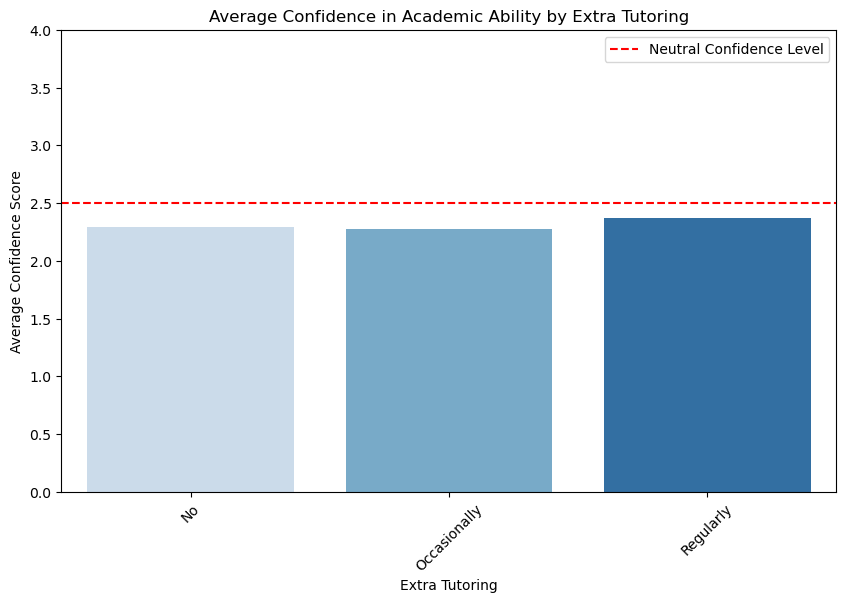

In [36]:
# Plotting the results
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Blues", n_colors=tutoring_confidence.shape[0])
sns.barplot(x='Extra Tutoring', y='Confidence_Score', data=tutoring_confidence, palette=palette, hue = "Extra Tutoring")
plt.title('Average Confidence in Academic Ability by Extra Tutoring')
plt.xlabel('Extra Tutoring')
plt.ylabel('Average Confidence Score')
plt.xticks(rotation=45)
plt.ylim(0, 4)
plt.axhline(2.5, ls='--', color='red', label='Neutral Confidence Level')
plt.legend()

image_path = '../../../docs/avgconf.png'  
plt.savefig(image_path)
plt.show()

### Insight on the Relationship Between Extra Tutoring and Confidence in Academic Ability

The analysis of the relationship between extra tutoring and students' confidence in their academic ability yielded the following average confidence scores based on tutoring frequency:

| Extra Tutoring  | Average Confidence Score |
|------------------|--------------------------|
| No               | 2.29                     |
| Occasionally     | 2.28                     |
| Regularly        | 2.37                     |

#### Key Observations:
1. **Confidence Levels**:
   - The average confidence score for students who participate in tutoring regularly is the highest at **2.37**, indicating a slightly greater level of confidence compared to those who do not participate in tutoring.
   - Students who attend tutoring occasionally and those who do not show similar average scores (**2.28** and **2.29**, respectively), suggesting that occasional tutoring does not significantly enhance confidence compared to no tutoring.

2. **Implications**:
   - The data suggests that while there is a slight positive trend in confidence scores with more frequent tutoring, the differences are not substantial among the categories studied.
   - The average confidence scores hover around the neutral level (**2.5**), indicating that the overall confidence in academic ability among students is relatively moderate, regardless of tutoring frequency.

3. **Further Considerations**:
   - Additional factors, such as the quality of tutoring, subject matter, and individual student differences, may play a role in influencing academic confidence.
   - It may be beneficial to investigate whether a threshold exists where tutoring becomes more effective or to analyze the impact of tutoring on other performance metrics, such as actual academic scores or exam results.

### Conclusion:
While there is a slight increase in confidence among students who engage in tutoring regularly, the overall impact of tutoring on academic confidence appears to be modest. Further research could explore deeper correlations or other influencing factors that contribute to academic confidence and performance.


## Finding the Relationship Between Extra Tutoring and JAMB Goal Scores

In [ ]:
jamb_score_mapping = {
    'Below 200': 1,
    '200 To 250': 2,
    '250 To 300': 3,
    '300 And Above': 4,
}

# Creating a new column for numerical JAMB scores
data_frame['JAMB_Score'] = data_frame['JAMB Goal Score'].map(jamb_score_mapping)

In [ ]:
tutoring_jamb_performance = data_frame.groupby('Extra Tutoring')['JAMB_Score'].mean().reset_index()

# Visualize the results
plt.figure(figsize=(10, 6))
# Use a color palette with a limited number of colors to match the unique values
palette = sns.color_palette("pastel", len(tutoring_jamb_performance))

sns.barplot(x='Extra Tutoring', y='JAMB_Score', data=tutoring_jamb_performance, palette=palette,hue = "Extra Tutoring")

plt.title('Average JAMB Goal Score Based on Extra Tutoring Participation', fontsize=16)
plt.xlabel('Extra Tutoring', fontsize=14)
plt.ylabel('Average JAMB Goal Score', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

image_path = '../../../docs/avgjambgoal.png'  
plt.savefig(image_path)

In [ ]:
tutoring_jamb_performance

### Insights
1. **Variation in Performance**:
   - Students who reported attending tutoring **occasionally** achieved the highest average JAMB goal score (3.318). This suggests that moderate engagement with tutoring may positively influence students' goal-setting and motivation for the JAMB exam.
   - Those who did **not** attend extra tutoring had a slightly lower average goal score (3.229), indicating that even minimal tutoring might support students in reaching their academic goals.
   - Interestingly, students who participated in tutoring **regularly** had the lowest average JAMB goal score (3.033). This might suggest that while regular tutoring provides consistent support, it could lead to complacency or dependency, potentially hindering students' intrinsic motivation to achieve their JAMB goals.

2. **Implications for Future Tutoring Programs**:
   - The data implies that while extra tutoring can contribute to achieving JAMB goals, the frequency and nature of tutoring should be carefully considered to maximize effectiveness.
   - It may be beneficial to assess the content and delivery methods of regular tutoring sessions to enhance engagement and encourage self-directed study among students.

### Conclusion
This analysis a nuanced relationship between extra tutoring and students' JAMB gJAMB exam.
